# HW8: Fourier analysis


A periodic function, $f(t)$, can be written as a Fourier
  series,
 \begin{equation*}
f(t) = \frac{1}{2} a_0 + \sum_{n=1}^\infty (a_n \cos n \omega_0 t +
b_n \sin n \omega_0 t)
\end{equation*}
where $\omega_0$ is the fundamental angular frequency given by
\begin{equation*}
\omega_0 = \frac{2 \pi}{T}
\end{equation*}
The Fourier coefficients are given by
\begin{eqnarray*}
a_n &=& \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cos n \omega_0 t dt\\
b_n &=& \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin n \omega_0 t dt
\end{eqnarray*}
where $\frac{1}{2} a_0$ is the average value of $f(t)$.

1.  The method for evaluating the coefficients is known as "Fourier's trick".  Start with the Fourier $\sin$ series. Multiply both sides of the equation by $\sin(m \omega_o t)$ and integrate the periodic function over one full period. i.e.,
\begin{equation*}
\int_{-T/2}^{T/2} f(t) \sin( m \omega_o t) dt = \int_{-T/2}^{T/2}\sum_{n=1}^\infty 
b_n \sin( n \omega_o t) \sin( m \omega_o t) dt
\end{equation*}
Show that
\begin{eqnarray*}
b_n &=& \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin n \omega_0 t dt.
\end{eqnarray*}

Feel free to use numerical integration!  Otherwise, demonstrate "Fourier's trick" analytically.  It turns out that $\cos$ and $\sin$ functions are *orthogonal* functions (i.e., $\int \sin(m \omega_o t) \sin(n \omega_o t) dt \ne 0$ for $m = n$).  Think of $\sin$ and $\cos$ as basis functions for an infinite dimensional vector space (continuous functions).  Any function can be described with these basis functions, just as any point in 3-space can be described in terms of the vector sum of multiples of the unit *basis* vectors $\hat{x}$, $\hat{y}$, $\hat{z}$.  Compare the dot product operation for discrete basis vectors with integrals of the continuous basis functions.

Consider the anharmonic (but periodic) function
\begin{equation*}
f(t) = 
\begin{cases}
-0.5 &~~ -\pi < t < 0\\
0.5 &~~ 0 < t < \pi\\
\end{cases}
\end{equation*}

2. Show that $f(t)$ can be represented as
\begin{equation*}
f(t) = \frac{2}{\pi} \left[\sin (t) + \frac{1}{3} \sin (3t) + \frac{1}{5} \sin (5t) + \cdot \cdot \cdot \right] 
\end{equation*}
by evaluating the $b_n$ integral for the first five terms ($n$ = 1, 2, 3, 4, 5).  Again, feel free to use numerical integration!  Why does the $\cos$ series not apply in this case? 

**Because when t = 0 in the cosine case it equals to 1 which doesn't match up with this function. This function is also an odd function thus we would use sin to describe it and not cosine**

3. Plot the first 3 terms.  Increase the number of terms until you are satisfied that the Fourier series representation of $f(t)$ is sufficiently accurate.  Increase the domain (e.g., $-2 \pi < t < 2 \pi$).



(1.0, 7.339842047382021e-10)
(0.9999999999999999, 7.339840957243382e-10)
(1.0000000000000002, 1.1153567219118754e-14)
(1.9378144044724096e-17, 9.292981423443536e-15)
(4.163336342344337e-17, 6.473948876983826e-10)
(8.6776382252004e-18, 8.992806499463768e-15)
Part 2:
First term theory: 0.6366197723675814
Second term theory: 0.2122065907891938
Third term theory: 0.12732395447351627
0.6366197723675814
3.535629420278822e-17
0.2122065907891938
-2.4563333591025376e-17
0.12732395447351627
1.4088683037955825e-17
0.09094568176679727
-1.3286126012781048e-16
0.07073553026306449
-2.235780440470995e-16
0.05787452476068909


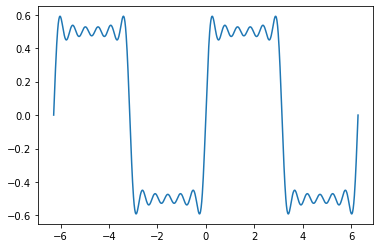

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate

# Part 1: ----------------------------------------------------------------------

# Parameters:
omega0 = np.pi
period = 2*np.pi/omega0

# When n = m
print(integrate.quad(lambda t: np.sin(1*omega0*t)*np.sin(1*omega0*t), -period/2, period/2))
print(integrate.quad(lambda t: np.sin(2*omega0*t)*np.sin(2*omega0*t), -period/2, period/2))
print(integrate.quad(lambda t: np.sin(3*omega0*t)*np.sin(3*omega0*t), -period/2, period/2))

# When n != m
print(integrate.quad(lambda t: np.sin(1*omega0*t)*np.sin(2*omega0*t), -period/2, period/2))
print(integrate.quad(lambda t: np.sin(1*omega0*t)*np.sin(3*omega0*t), -period/2, period/2))
print(integrate.quad(lambda t: np.sin(2*omega0*t)*np.sin(3*omega0*t), -period/2, period/2))

# If you continue inductively, this shows that when n != m the integral is equal to zero.

# Part 2: ----------------------------------------------------------------------
print("Part 2:")

def F(t):
  if (t > -np.pi and t < 0):
    return -0.5
  if (t < np.pi and t > 0):
    return 0.5

# Parameters:
omega0 = 1
period = 2*np.pi/omega0
n = [1,2,3,4,5,6,7,8,9,10,11]
b = np.zeros(len(n))

# Actual Coefficients:
print("First term theory: " + str(2/np.pi))
print("Second term theory: " + str(2/(3*np.pi)))
print("Third term theory: " + str(2/(5*np.pi)))

# Calculating b_i
for i in range(len(n)):
  ans = integrate.quad(lambda t: F(t)*np.sin(n[i]*omega0*t), 0, period/2)
  b[i] = (2/period)*2*ans[0]
  print(b[i])

# Part 3: ----------------------------------------------------------------------
# Getting pretty close at 
temporal = np.linspace(-period,period,1000)
funcapprox = lambda t: b[0]*np.sin(t*omega0) + b[2]*np.sin(3*omega0*t) + b[4]*np.sin(5*omega0*t) + b[6]*np.sin(7*omega0*t) + b[8]*np.sin(9*omega0*t) + b[10]*np.sin(11*omega0*t)
plt.figure()
plt.plot(temporal, funcapprox(temporal))

4. The Fourier coefficients of a "sawtooth" function are given by $a_n = 0$, $b_n = (2/n \pi)(-1)^{n-1}$, i.e.,
\begin{equation*}
f(t) = \frac{t}{\pi}, ~~ -\pi < t < \pi
\end{equation*}
Plot the Fourier series and confirm the result.

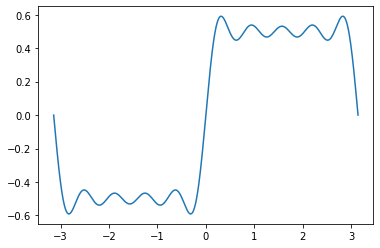

In [ ]:
# Part 4: ----------------------------------------------------------------------
temporal = np.linspace(-np.pi,np.pi,1000)

b_n = np.zeros(10)
for i in range(len(b_n)):
  b_n[i] = 2/((i+1)*np.pi)*(-1)**(i)

funcapprox = lambda t: b[0]*np.sin(t*omega0) + b[1]*np.sin(2*omega0*t) + b[2]*np.sin(3*omega0*t) + b[3]*np.sin(4*omega0*t) + b[4]*np.sin(5*omega0*t) + b[5]*np.sin(6*omega0*t) + b[6]*np.sin(7*t*omega0) + b[7]*np.sin(8*omega0*t) + b[8]*np.sin(9*omega0*t)
plt.plot(temporal, funcapprox(temporal))

# Could add more of course...

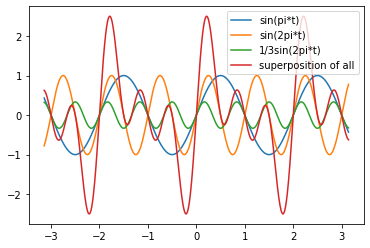

In [6]:
# - PHYS 301: Mathematical Physics:
# - Homework 10: Question 3
import numpy as np
import matplotlib.pyplot as plt

temporal = np.linspace(-np.pi,np.pi,1000)
omega0 = np.pi

func1 = lambda t: np.sin(omega0*t)
func2 = lambda t: np.sin(2*omega0*t)
func3 = lambda t: 1/3*np.sin(3*omega0*t)
func123 = lambda t: np.sin(t*omega0) + np.sin(2*omega0*t) + np.sin(3*omega0*t)

plt.plot(temporal, func1(temporal), label='sin(pi*t)')
plt.plot(temporal, func2(temporal), label='sin(2pi*t)')
plt.plot(temporal, func3(temporal), label='1/3sin(2pi*t)')
plt.plot(temporal, func123(temporal), label='superposition of all')
plt.legend()